# **EKSPLORASI DATA**



In [14]:
import pandas as pd

df = pd.read_csv("/content/sensor_maintenance_data.csv")
print(df.head())
print(df.info())
print(df.describe())

  Sensor_ID            Timestamp  Voltage (V)  Current (A)  Temperature (°C)  \
0       S_1  2024-01-01 00:00:00          110          0.5                20   
1       S_2  2024-01-01 01:00:00          111          0.6                21   
2       S_3  2024-01-01 02:00:00          112          0.7                22   
3       S_4  2024-01-01 03:00:00          113          0.8                23   
4       S_5  2024-01-01 04:00:00          114          0.9                24   

   Power (W)  Humidity (%)  Vibration (m/s²) Equipment_ID Operational Status  \
0       55.0            40              0.20          E_1        Operational   
1       66.6            41              0.25          E_2  Under Maintenance   
2       78.4            42              0.30          E_3        Operational   
3       90.4            43              0.35          E_4  Under Maintenance   
4      102.6            44              0.40          E_5        Operational   

   ... Ambient Temperature (°C) Ambien

# **DETEKSI ANOMALI**

In [9]:
from sklearn.ensemble import IsolationForest

numerical_features = df.iloc[:, 1:].select_dtypes(include=['number'])

model = IsolationForest(contamination=0.05)
df["anomaly"] = model.fit_predict(numerical_features)
print(df[df["anomaly"] == -1])

    Sensor_ID            Timestamp  Voltage (V)  Current (A)  \
0         S_1  2024-01-01 00:00:00          110          0.5   
9        S_10  2024-01-01 09:00:00          119          0.9   
84       S_85  2024-01-04 12:00:00          114          0.9   
90       S_91  2024-01-04 18:00:00          110          0.5   
99      S_100  2024-01-05 03:00:00          119          0.9   
100     S_101  2024-01-05 04:00:00          110          0.5   
108     S_109  2024-01-05 12:00:00          118          0.8   
180     S_181  2024-01-08 12:00:00          110          0.5   
200     S_201  2024-01-09 08:00:00          110          0.5   
204     S_205  2024-01-09 12:00:00          114          0.9   
210     S_211  2024-01-09 18:00:00          110          0.5   
240     S_241  2024-01-11 00:00:00          110          0.5   
249     S_250  2024-01-11 09:00:00          119          0.9   
264     S_265  2024-01-12 00:00:00          114          0.9   
294     S_295  2024-01-13 06:00:00      

# **PEMELIHARAAN PREDIKTIF RANDOM FOREST**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

target_column = "sensor_status"

if target_column in df.columns:
    X = df.drop([target_column], axis=1)
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print("Akurasi Model:", accuracy_score(y_test, y_pred))
else:
    print(f"Column '{target_column}' not found in the DataFrame. Please check your data.")
    print("Available columns:", df.columns)

Column 'sensor_status' not found in the DataFrame. Please check your data.
Available columns: Index(['Sensor_ID', 'Timestamp', 'Voltage (V)', 'Current (A)',
       'Temperature (°C)', 'Power (W)', 'Humidity (%)', 'Vibration (m/s²)',
       'Equipment_ID', 'Operational Status', 'Fault Status', 'Failure Type',
       'Last Maintenance Date', 'Maintenance Type', 'Failure History',
       'Repair Time (hrs)', 'Maintenance Costs (USD)',
       'Ambient Temperature (°C)', 'Ambient Humidity (%)', 'External Factors',
       'X', 'Y', 'Z', 'Equipment Relationship', 'Equipment Criticality',
       'Fault Detected', 'Predictive Maintenance Trigger', 'anomaly'],
      dtype='object')


# **FEATURE ENGINEERING PCA**

In [19]:
from sklearn.decomposition import PCA

target_column = "sensor_status"

if target_column in df.columns:
    X = df.drop([target_column], axis=1)
else:
    print(f"Column '{target_column}' not found in the DataFrame. Please check your data.")
    print("Available columns:", df.columns)
    if "anomaly" in df.columns:
        X = df.drop(columns=['anomaly'])
    else:
        X = df.copy()

X = X.select_dtypes(include=['number'])

X.fillna(X.mean(), inplace=True)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Varians yang dijelaskan:", pca.explained_variance_ratio_)

Column 'sensor_status' not found in the DataFrame. Please check your data.
Available columns: Index(['Sensor_ID', 'Timestamp', 'Voltage (V)', 'Current (A)',
       'Temperature (°C)', 'Power (W)', 'Humidity (%)', 'Vibration (m/s²)',
       'Equipment_ID', 'Operational Status', 'Fault Status', 'Failure Type',
       'Last Maintenance Date', 'Maintenance Type', 'Failure History',
       'Repair Time (hrs)', 'Maintenance Costs (USD)',
       'Ambient Temperature (°C)', 'Ambient Humidity (%)', 'External Factors',
       'X', 'Y', 'Z', 'Equipment Relationship', 'Equipment Criticality',
       'Fault Detected', 'Predictive Maintenance Trigger'],
      dtype='object')
Varians yang dijelaskan: [0.46599351 0.36119179]


# **PEMBUATAN DASHBOARD**

<ipython-input-24-a799c9f136a2>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[time_column] = pd.to_datetime(df[time_column], errors='coerce')


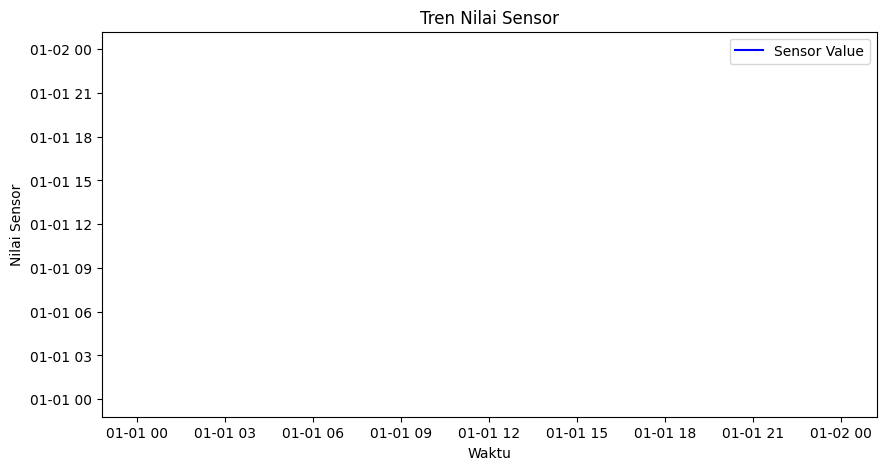

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

time_column = "Sensor_ID"

sensor_value_columns = [col for col in df.columns if "sensor" in col.lower() or "value" in col.lower()]

if sensor_value_columns:
    sensor_value_column = sensor_value_columns[0]
else:
    raise ValueError("No column containing 'sensor' or 'value' found in DataFrame. Available columns:", df.columns)

try:
    df[time_column] = pd.to_datetime(df[time_column], errors='coerce')
except (pd.errors.OutOfBoundsDatetime, TypeError):  # Handle potential datetime conversion errors
    print(f"Warning: Could not convert '{time_column}' to datetime. Using as is.")

df = df.dropna(subset=[time_column, sensor_value_column])  # Remove missing rows

plt.figure(figsize=(10, 5))
plt.plot(df[time_column], df[sensor_value_column], color="blue", label="Sensor Value")
plt.xlabel("Waktu")
plt.ylabel("Nilai Sensor")
plt.title("Tren Nilai Sensor")
plt.legend()
plt.show()

menghitung statistik deskriptif

In [27]:
import pandas as pd

df = pd.read_csv("/content/sensor_maintenance_data.csv")

if 'anomaly' not in df.columns:
    from sklearn.ensemble import IsolationForest

    numerical_features = df.iloc[:, 1:].select_dtypes(include=['number'])
    model = IsolationForest(contamination=0.05)
    df["anomaly"] = model.fit_predict(numerical_features)

print(df.info())
print(df.describe())
print("Persentase anomali:", df["anomaly"].mean() * 100, "%")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Sensor_ID                       500 non-null    object 
 1   Timestamp                       500 non-null    object 
 2   Voltage (V)                     500 non-null    int64  
 3   Current (A)                     500 non-null    float64
 4   Temperature (°C)                500 non-null    int64  
 5   Power (W)                       500 non-null    float64
 6   Humidity (%)                    500 non-null    int64  
 7   Vibration (m/s²)                500 non-null    float64
 8   Equipment_ID                    500 non-null    object 
 9   Operational Status              500 non-null    object 
 10  Fault Status                    500 non-null    object 
 11  Failure Type                    200 non-null    object 
 12  Last Maintenance Date           500 

anomali data

In [29]:
from sklearn.ensemble import IsolationForest

numerical_features = df.select_dtypes(include=['number']).drop(columns=['Sensor_ID'], errors='ignore')

model = IsolationForest(contamination=0.05)
df["anomaly"] = model.fit_predict(numerical_features)
print(df[df["anomaly"] == -1])

    Sensor_ID            Timestamp  Voltage (V)  Current (A)  \
0         S_1  2024-01-01 00:00:00          110          0.5   
9        S_10  2024-01-01 09:00:00          119          0.9   
60       S_61  2024-01-03 12:00:00          110          0.5   
90       S_91  2024-01-04 18:00:00          110          0.5   
99      S_100  2024-01-05 03:00:00          119          0.9   
100     S_101  2024-01-05 04:00:00          110          0.5   
120     S_121  2024-01-06 00:00:00          110          0.5   
144     S_145  2024-01-07 00:00:00          114          0.9   
150     S_151  2024-01-07 06:00:00          110          0.5   
180     S_181  2024-01-08 12:00:00          110          0.5   
200     S_201  2024-01-09 08:00:00          110          0.5   
204     S_205  2024-01-09 12:00:00          114          0.9   
210     S_211  2024-01-09 18:00:00          110          0.5   
240     S_241  2024-01-11 00:00:00          110          0.5   
249     S_250  2024-01-11 09:00:00      

implementasi model machine learning

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

target_column = "sensor_status"

if target_column not in df.columns:
    if "anomaly" in df.columns:
        target_column = "anomaly"
        print(f"Using '{target_column}' column as target instead of 'sensor_status'.")
    else:
        # The raise statement should be at the same level as the if/else
        raise KeyError(f"'sensor_status' and 'anomaly' columns not found in DataFrame. Please check your data.")

# The rest of your code should be outside the if block
# Exclude 'Sensor_ID' column from features
X = df.drop([target_column, 'Sensor_ID'], axis=1).select_dtypes(include=['number'])
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

Using 'anomaly' column as target instead of 'sensor_status'.


RandomForestClassifier()